In [1]:
# do the required imports
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
import plotly
import plotly.graph_objs as go
from plotly.graph_objs import *
sys.path.append(r'Modules')
import wellplate_tools_pandas_oad as wpt
%matplotlib inline

In [2]:
#filename_single = r'Data\well96_1Pos_Single.csv'
#filename_single = r'Data\fixed endpoint 3C 2_5 384well_Single.csv'
#filename_single = r'Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions.csv'
#filename_single = r'Data\96Well_Test_4Well.csv'
#filename_single = r'Data\Marion.csv'
filename_single = r'Data\96well_C3-G9_1Pos Single.csv'

# define wellplate type
platetype = 96
# get numer of rows and columns
Nr, Nc = wpt.getrowandcolumn(platetype)

# read the CSV table containing all the single object data for
# further "in-depth" analysis
df_single = pd.read_csv(filename_single, sep=';')

# get headers and number of measurement parameters
# default number of non-measurement parameters = 5 (the first five columns from ZEN CSV Export)
num_nonmp = 5
headers = df_single.head(0)
num_param = len(df_single.columns) - num_nonmp
print('Number of Object Parameters: ', num_param)
df_single.rename(columns={df_single.columns[0]: 'WellID',
                          df_single.columns[1]: 'RowID',
                          df_single.columns[2]: 'ColumnID',
                          df_single.columns[3]: 'ID',
                          df_single.columns[4]: 'Index'}, inplace=True)

Number of Object Parameters:  5


In [3]:
# remove rows with units
df_single = wpt.remove_units(df_single)

# convert decimal separators
df_single = wpt.convert_dec_sep(df_single, num_nonmp)

# show part of dataframe
df_single[:6]

,WellID,RowID,ColumnID,ID,Index,IntensityMean_mCher::Intensity Mean Value of channel 'mCher'!!R,Area::Area!!R,Perimeter::Perimeter!!R,Roundness::Roundness!!R,FeretRatio::Feret Ratio!!R
1,C5,3.0,5.0,2.0,1.0,4189.072727,47.185772,28.461473,0.473184,0.493208
2,C5,3.0,5.0,3.0,2.0,3639.365079,54.049157,29.228797,0.524275,0.565917
3,C5,3.0,5.0,4.0,3.0,4215.082237,260.808631,61.619980,0.726289,0.777479
4,C5,3.0,5.0,5.0,4.0,3760.278986,236.786783,60.534821,0.558715,0.606669
5,C5,3.0,5.0,6.0,5.0,4370.756052,460.704719,88.903202,0.516083,0.538192
6,C5,3.0,5.0,7.0,6.0,4002.715909,301.988941,78.106141,0.404170,0.441099


In [4]:
# use statistics --> we just calculate the mean values
# for a wells to be displayed inside the heatmaps.
# currently implemented are mean, median, min, max.
stf = 'mean'

# create a dictionary containing a dataframe for every measure parameters
# as a heatmap and a dictionary containing the mean values for all wells
# containing actual data points.
heatmap_dict, well_dict = wpt.fill_heatmaps(df_single, num_param, Nr, Nc, statfunc=stf, showbar=True, verbose=False)

# show all keys
print(heatmap_dict.keys())

---------------------------------------------------
wellID_key :  WellID
Found keys:
Index(['WellID', 'RowID', 'ColumnID', 'ID', 'Index',
       'IntensityMean_mCher::Intensity Mean Value of channel 'mCher'!!R',
       'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R',
       'FeretRatio::Feret Ratio!!R'],
      dtype='object')
---------------------------------------------------


FloatProgress(value=1.0, description='Processing Wells', max=25.0, min=1.0)

dict_keys(["IntensityMean_mCher::Intensity Mean Value of channel 'mCher'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'FeretRatio::Feret Ratio!!R', 'ObjectNumbers'])


Heatmap image saved as:  Data\96well_C3-G9_1Pos Single_HM_ObjectNumbers.png


'Data\\96well_C3-G9_1Pos Single_HM_ObjectNumbers.png'

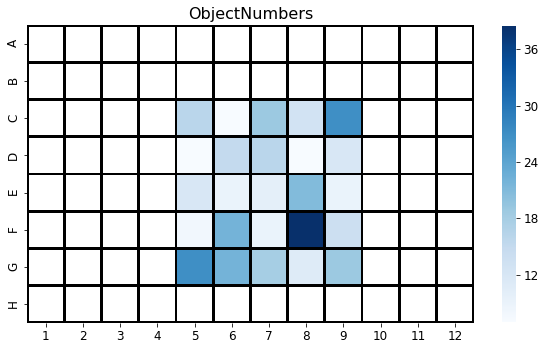

In [16]:
# define parameters to display the heatmap
parameter2display = 'ObjectNumbers'
colormap='Blues'
#colormap ='YlGnBu'
#colormap ='RdBu_r'
#colormap = 'RdYlBu'

# get the actual heatmap array to display it as an image
hm = heatmap_dict[parameter2display]

# show the heatmap for a single parameter
wpt.showheatmap(hm, parameter2display,
                fontsize_title=16,
                fontsize_label=12,
                colormap=colormap,
                linecolor='black',
                linewidth=2.0,
                save=True,
                filename=filename_single,
                dpi=300)


Heatmap image saved as:  Data\96well_C3-G9_1Pos Single_HM_all.png


'Data\\96well_C3-G9_1Pos Single_HM_all.png'

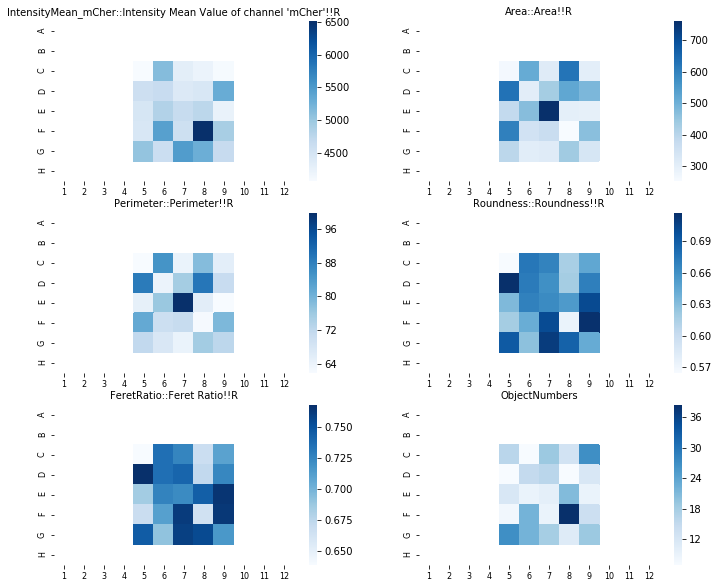

In [17]:
# define parameters to display the heatmap
#colormap ='YlGnBu'
#colormap ='RdBu_r'
colormap = 'Blues'

# show all heatmaps
wpt.showheatmap_all(heatmap_dict, [3, 2],
                    fontsize_title=10,
                    fontsize_label=8,
                    colormap=colormap,
                    linecolor=None,
                    linewidth=2.0,
                    save=True,
                    filename=filename_single)

In [18]:
# show all key = measure parameters for that dictionary
print(heatmap_dict.keys())

# example for entry for well ...
well_dict['F7']

dict_keys(["IntensityMean_mCher::Intensity Mean Value of channel 'mCher'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'FeretRatio::Feret Ratio!!R', 'ObjectNumbers'])


WellID                                                                   F7
RowID                                                                     6
ColumnID                                                                  7
IntensityMean_mCher::Intensity Mean Value of channel 'mCher'!!R     4586.59
Area::Area!!R                                                       373.483
Perimeter::Perimeter!!R                                             71.1218
Roundness::Roundness!!R                                            0.700848
FeretRatio::Feret Ratio!!R                                         0.761961
ObjectNumbers                                                             9
Name: 18, dtype: object

In [19]:
# show example entry of the dictionary for a parameter
well_df = heatmap_dict[parameter2display]

In [20]:
qgrid_widget = qgrid.show_grid(well_df, show_toolbar=True, )
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [21]:
rowlabel, collabel = wpt.extract_labels(Nr, Nc)

data = [go.Heatmap(z=hm.values.tolist(),
                   x=rowlabel,
                   y=collabel,
                   colorscale='Viridis'),
       ]

layout = go.Layout(title=parameter2display,
                   autosize = True,
                   xaxis = dict(autotick=False,
                                title='Columns',
                                showgrid=True,
                                gridwidth=5,
                                ticks=collabel,
                                nticks=Nc),
                   yaxis = dict(autotick=False,
                                title='Rows',
                                showgrid=True,
                                gridwidth=5,
                                ticks=collabel,
                                nticks=Nr,
                                autorange='reversed'),
                  )

fig = go.Figure(data=data, layout=layout)

In [22]:
plotly.offline.init_notebook_mode(connected=True)
#data = [go.Heatmap(z=well_df.values.tolist(), colorscale='Viridis')]
#plotly.offline.iplot(data, filename='basic-heatmap')
plotly.offline.iplot(fig, filename='basic-heatmap')